In [14]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import pandas_ta as ta
import numpy as np
import json
from tkinter import *
from tkinter import messagebox, ttk, END
from matplotlib import dates

In [15]:
today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [16]:
ticker = input('Write ticker: ')
stock_data = yf.download(ticker, start = start_date, end = end_date, progress=False)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,0.398060,0.407091,0.377222,0.382466,0.382466,1488178634
2023-02-10,0.382442,0.387627,0.378620,0.382645,0.382645,877457864
2023-02-11,0.382646,0.384111,0.380901,0.384008,0.384008,436697705
2023-02-12,0.383982,0.384864,0.374452,0.375282,0.375282,492457255
2023-02-13,0.375240,0.378181,0.364122,0.371675,0.371675,1129015396
...,...,...,...,...,...,...
2025-02-03,2.579795,2.779850,1.948621,2.701156,2.701156,36745099581
2025-02-04,2.701309,2.776645,2.435540,2.535425,2.535425,14154535566
2025-02-05,2.535369,2.567157,2.356648,2.382315,2.382315,7724989243


In [17]:
#RSI, Garman, ATR, MACD
stock_data['RSI'] = ta.rsi(close = stock_data["Adj Close"], length=14)

stock_data['Garman'] = ((np.log(stock_data['High'])- np.log(stock_data['Low']))**2)/2-(2*np.log(2)-1)*((np.log(stock_data['Adj Close']) -np.log(stock_data['Open']))**2)

def compute_atr(stock_data):
    atr = ta.atr(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())
stock_data['ATR'] = compute_atr(stock_data)

def compute_macd(stock_data, short_period=12, long_period=26, signal_period=9):
    # Compute MACD, Signal Line, and Histogram using pandas_ta
    macd = ta.macd(
        close=stock_data['Close'], 
        fast=short_period, 
        slow=long_period, 
        signal=signal_period
    )
    
    # Assign the results to new columns in the DataFrame
    stock_data['MACD'] = macd['MACD_12_26_9']  # Default naming format
    stock_data['Signal'] = macd['MACDs_12_26_9']
    stock_data['MACD_Histogram'] = macd['MACDh_12_26_9']
    
    return stock_data

# Apply the function to compute MACD
stock_data = compute_macd(stock_data)

today = date.today() 
two_weeks = today - timedelta(days=14)

#Last 14 days
technical_analysis = stock_data.iloc[-14:]
technical_analysis

,Open,High,Low,Close,Adj Close,Volume,RSI,Garman,ATR,MACD,Signal,MACD_Histogram
Date,,,,,,,,,,,,
2025-01-25,3.103425,3.141713,3.082718,3.109706,3.109706,3304586596,63.347845,0.000178,2.763589,0.223431,0.220699,0.002731
2025-01-26,3.109702,3.141089,3.023400,3.026228,3.026228,3480601702,59.228700,0.000443,2.657897,0.206841,0.217928,-0.011087
2025-01-27,3.026278,3.053671,2.708483,3.053185,3.053185,15974106216,60.130278,0.007164,2.845399,0.193636,0.213069,-0.019433
2025-01-28,3.053234,3.209089,3.011394,3.061120,3.061120,9497347683,60.407815,0.002019,2.834318,0.181716,0.206799,-0.025082
2025-01-29,3.061098,3.127435,2.976758,3.068294,3.068294,6882287654,60.674348,0.001217,2.764993,0.170879,0.199615,-0.028735
2025-01-30,3.068402,3.151331,3.053315,3.131069,3.131069,4868674752,63.020268,0.000341,2.634500,0.165449,0.192782,-0.027333
2025-01-31,3.131045,3.131133,3.006485,3.035420,3.035420,4520254155,57.401517,0.000453,2.546767,0.151679,0.184561,-0.032882
2025-02-01,3.035398,3.068511,2.838141,2.884469,2.884469,4886927800,49.848030,0.002041,2.598043,0.127120,0.173073,-0.045953
2025-02-02,2.884463,2.952875,2.486935,2.579795,2.579795,15654662798,38.761229,0.009932,2.941435,0.082126,0.154884,-0.072757


In [18]:
#Price chart
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Adj Close'], mode='lines', name='Adj Close')])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title=f'{ticker} Price',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()

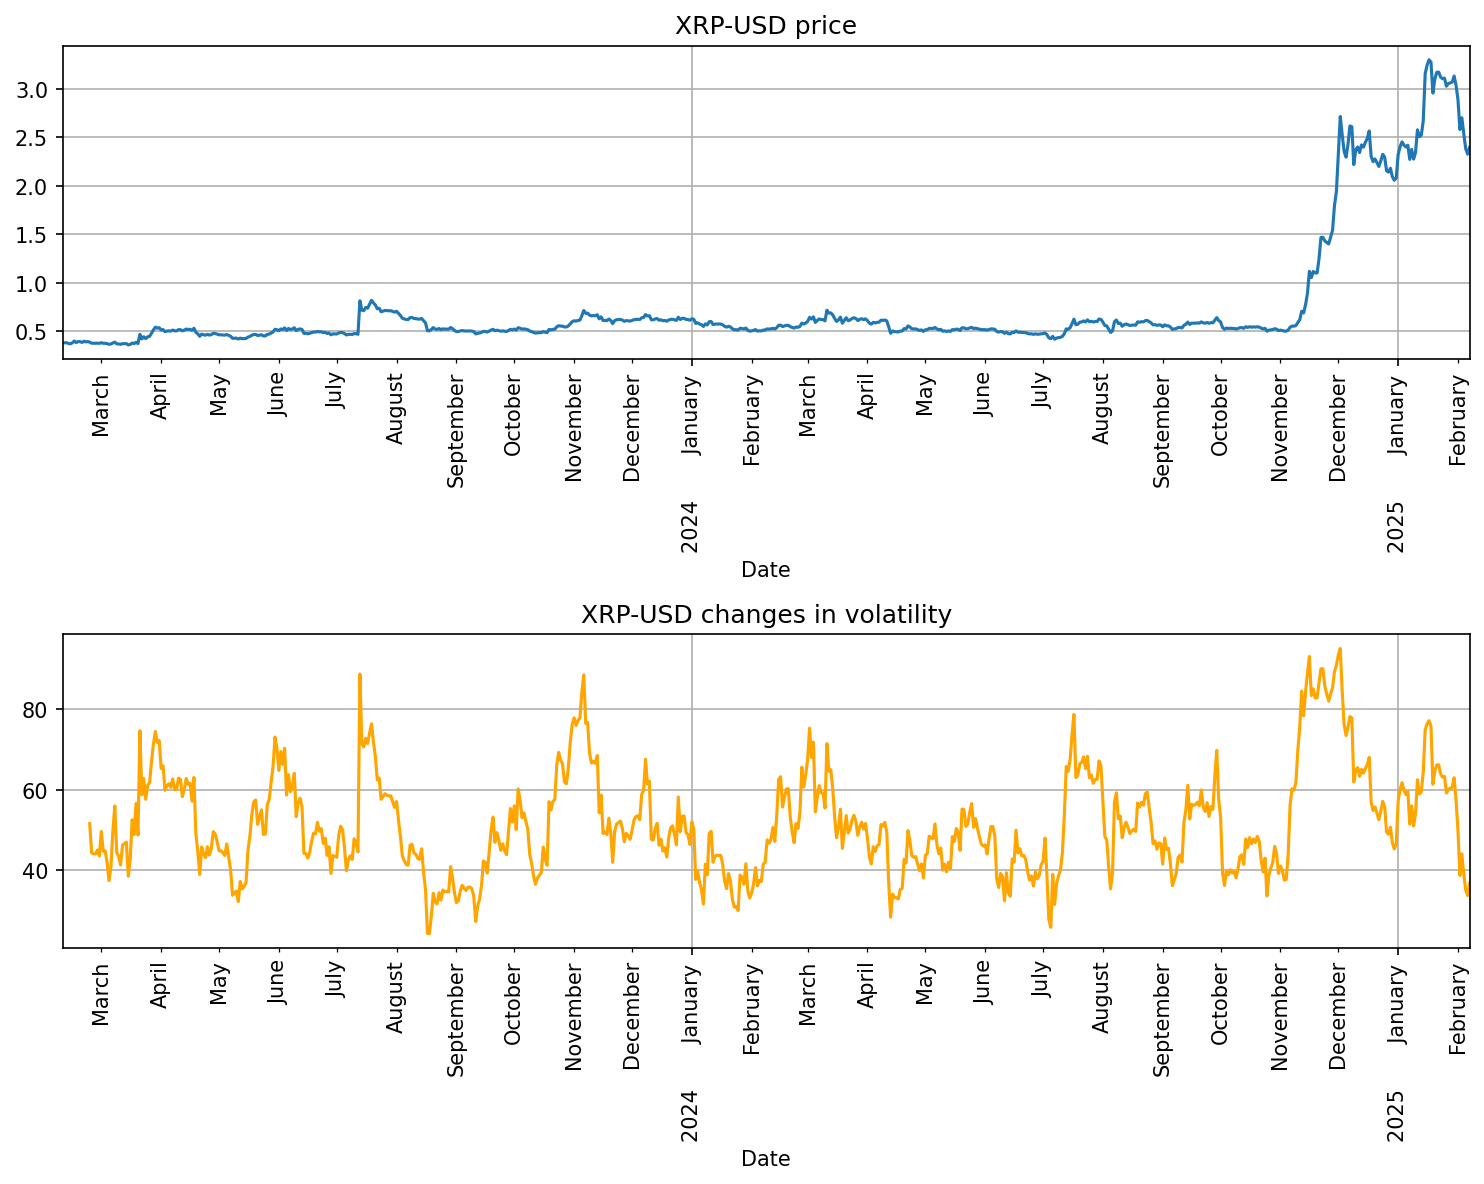

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), dpi=150)
stock_data['Adj Close'].plot(ax=ax[0])
ax[0].set_title(f'{ticker} price')
ax[0].xaxis.set_major_locator(dates.YearLocator())
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%Y       %B'))
ax[0].tick_params(axis='x', which = 'major', rotation = 90)
ax[0].xaxis.set_minor_locator(dates.MonthLocator())
ax[0].xaxis.set_minor_formatter(dates.DateFormatter('%B'))
ax[0].tick_params(axis='x', which = 'minor', rotation = 90)

ax[0].xaxis.grid()
ax[0].yaxis.grid()

#Voltality
stock_data['RSI'].plot(ax=ax[1], c='orange')
ax[1].set_title(f'{ticker} RSI')
ax[1].xaxis.set_major_locator(dates.YearLocator())
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%Y       %B'))
ax[1].tick_params(axis='x', which = 'major', rotation = 90)
ax[1].xaxis.set_minor_locator(dates.MonthLocator())
ax[1].xaxis.set_minor_formatter(dates.DateFormatter('%B'))
ax[1].tick_params(axis='x', which = 'minor', rotation = 90)

ax[1].xaxis.grid()
ax[1].yaxis.grid()

plt.tight_layout()
plt.show()

In [20]:
#Candlestick
fig = go.Figure(data=[go.Candlestick(x=stock_data.index, open = stock_data['Open'], close=stock_data['Close'], high = stock_data['High'], low=stock_data['Low'])])
fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title=f'{ticker} stock', xaxis_title='Date', plot_bgcolor='lightgrey',
                  width=1050, height = 600)
fig.show()

In [21]:
#RSI
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='RSI')])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title=f'{ticker} RSI',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()

In [22]:
#MACD
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=stock_data.index,
    y=stock_data['MACD'],
    mode='lines',
    name='MACD Line',
    line=dict(color='blue', width=2)
))

fig.add_trace(go.Scatter(
    x=stock_data.index,
    y=stock_data['Signal'],
    mode='lines',
    name='Signal Line',
    line=dict(color='orange', width=2)
))

fig.add_trace(go.Bar(
    x=stock_data.index,
    y=stock_data['MACD_Histogram'],
    name='MACD Histogram',
    marker_color='green',
    opacity=0.5
))

fig.update_layout(
    title=f'{ticker} MACD Analysis',
    xaxis_title='Date',
    yaxis_title=f'{ticker} MACD Value',
    plot_bgcolor='lightgrey',
    xaxis_rangeslider_visible=False,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    width=1050,
    height=600
)

# Display and save the chart
fig.show()
fig.write_image('./images/MACD.png')

In [27]:
#MA
stock_data['M10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['M20'] = stock_data['Close'].rolling(window=20).mean()

#Bolinger Bands
stock_data['SD'] = stock_data['Close'].rolling(window=20).std()
# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
stock_data['UB'] = stock_data['M20'] + 2 * stock_data['SD']
stock_data['LB'] = stock_data['M20'] - 2 * stock_data['SD']

#BB graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['UB'], mode='lines', name='Upper Bollinger Band', visible=True, line=dict(color='red')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['LB'], fill='tonexty', mode='lines', name='Lower Bollinger Band', visible=True, line=dict(color='green')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['M20'], mode='lines', name='Middle Bollinger Band', visible=True, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price (Bollinger)', visible=True, line=dict(color='black')))
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title=f'{ticker} Bolinger Bands',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()
fig.write_image('./images/Bollinger_Bands.png')

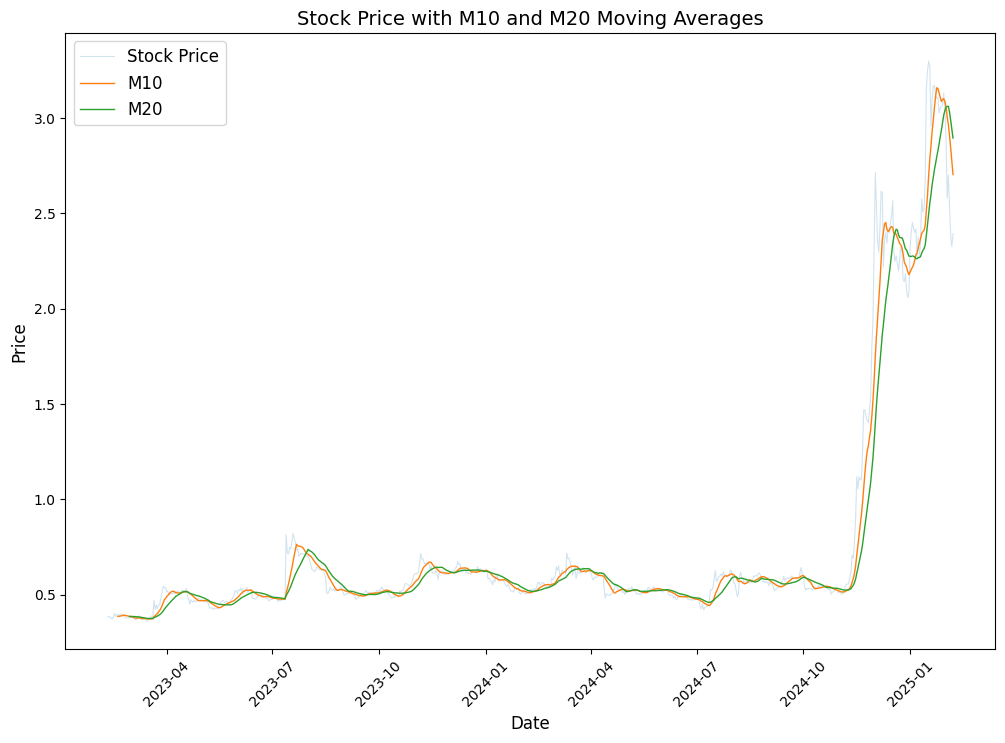

In [29]:
#MA graph
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', linewidth=0.8, alpha=0.2)

plt.plot(stock_data.index, stock_data['M10'], label='M10', linewidth=1, alpha=1)
plt.plot(stock_data.index, stock_data['M20'], label='M20', linewidth=1, alpha=1)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Stock Price with M10 and M20 Moving Averages', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Sharpe and Sortino Ratio